# SAR table in Jupyter notebook

Adapted from http://rdkit.blogspot.com/2019/11/constructing-sar-tables-in-jupyter.html

Structure-Activity Relationship (SAR) is perhaps the most important concept in drug development. Medicinal chemists can “read” SAR like a travel guide. Establishing SAR informs precisely those positions on a molecule where one can modify, to improve certain properties.

<div style="font-size: 10px" > src: https://www.monash.edu/atmcf/capabilities/-developing-structure-activity-relationships-sar </div>

In [1]:
from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import rdRGroupDecomposition
from rdkit.Chem import rdDepictor
from rdkit.Chem.Draw import rdMolDraw2D
import rdkit
import pandas as pd
import numpy as np
from rdkit.Chem import PandasTools
import time
print(rdkit.__version__)
print(time.ctime())

2022.09.5
Mon Mar 13 14:38:27 2023


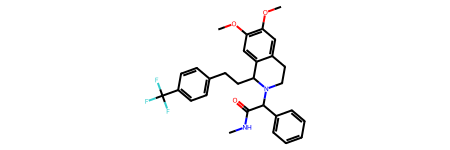

In [2]:
Almorexant = Chem.MolFromSmiles("CNC(=O)C(C1=CC=CC=C1)N2CCC3=CC(=C(C=C3C2CCC4=CC=C(C=C4)C(F)(F)F)OC)OC")
Almorexant

Almorexant (Tetrahydroisoquinoline series), also known by its development code ACT-078573, is an orexin antagonist, acting as a competitive antagonist of the OX1 and OX2 orexin receptors, which was being developed by the pharmaceutical companies Actelion and GSK for the treatment of insomnia

Below, you will find data from ChEMBL for a set tetrahydroisoquinoline OX2 antagonist compounds with IC50 values

,Molecule ChEMBL ID,Smiles,IC50,doc_id,ROMol
0,CHEMBL2413367,COc1ccc(C[C@H]2c3cc(OC)c(OC)cc3CCN2[C@@H](C(=O...,417.0,1234,
1,CHEMBL3771066,COc1ccc(CC2c3cc(OC(C)C)c(OC)cc3CCN2CC(=O)NCc2c...,10000.0,1234,
2,CHEMBL444407,COc1ccc(CC2c3cc(OC)c(OC)cc3CCN2C(C(=O)Nc2ccc3c...,1814.0,1234,
3,CHEMBL451281,COc1cc2c(cc1OC)C(Cc1ccc(Oc3ncccn3)c(OC)c1)N(CC...,240.0,1234,
4,CHEMBL454924,COc1cc2c(cc1OC)C(CCc1ccc(F)c(F)c1)N(C(C(=O)NCC...,14.0,1234,

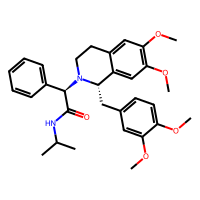
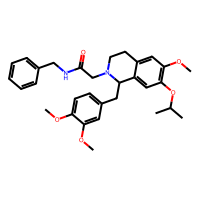
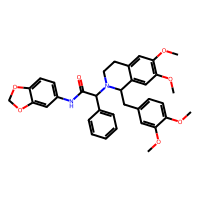
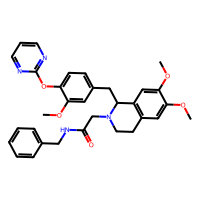
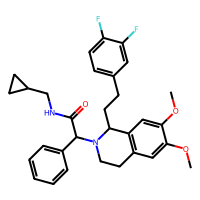

In [3]:
df = pd.read_csv('./data/almorexant_ChEMBL.csv')
PandasTools.AddMoleculeColumnToFrame(df,smilesCol='Smiles')
PandasTools.RenderImagesInAllDataFrames(images=True)
df.head()

In [6]:
def groups_to_df(groups,mols,include_core=False,redraw_sidechains=False):
    """ converts the results of an r-group decomposition into a humanly useful
    DataFrame
    
    """
    cols = ['Mol']+list(groups.keys())
    if redraw_sidechains:
        for k,vl in groups.items():
            if k=='Core':
                continue
            for i,v in enumerate(vl):
                vl[i] = Chem.RemoveHs(v)
                rdDepictor.Compute2DCoords(vl[i])

    
    if not include_core:
        cols.remove('Core')
        del groups['Core']
    groups['Mol'] = mols
    frame = pd.DataFrame(groups,columns=cols)
    PandasTools.ChangeMoleculeRendering(frame)
    return frame

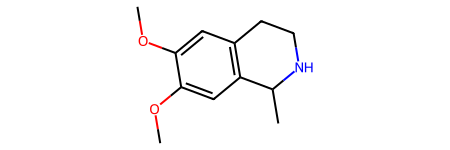

In [75]:
# we need to provide a scaffold to use for the r-group decomposition:
scaffold = "COc1cc2c(cc1OC)C(C)NCC2"
smi_scaffold = Chem.MolFromSmiles(scaffold)
smi_scaffold

((36, 35, 16, 15, 14, 19, 18, 17, 33, 34, 20, 21, 11, 12, 13),)


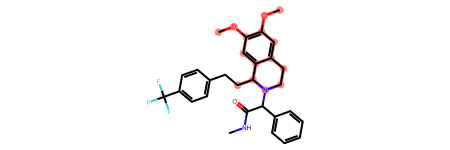

In [77]:
# highlight scaffold in Almorexant
print(Almorexant.GetSubstructMatches(smi_scaffold))
Almorexant

,Mol,R1,R2,R3
0,,,,
1,,,,
2,,,,
3,,,,
4,,,,

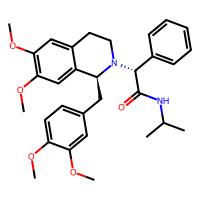
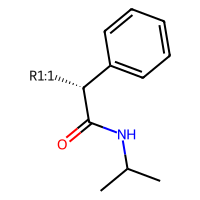
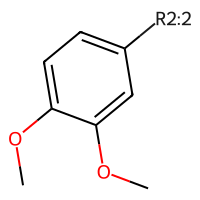
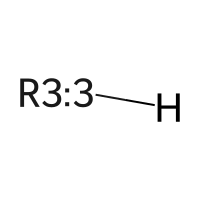
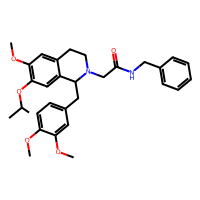
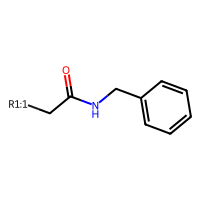
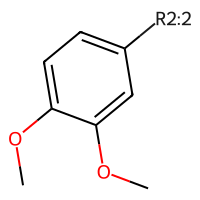
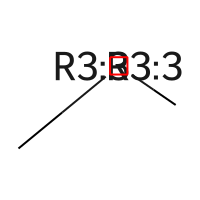
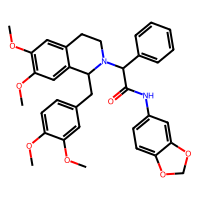
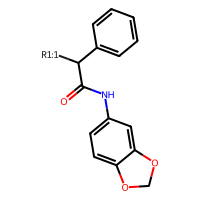
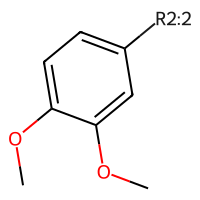
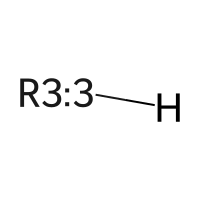
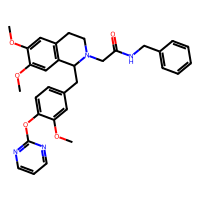
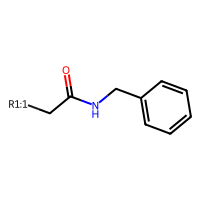
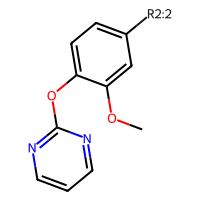
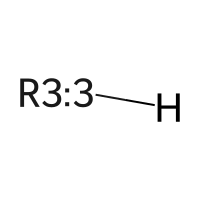
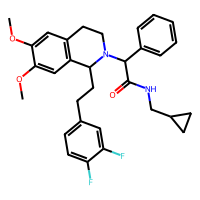
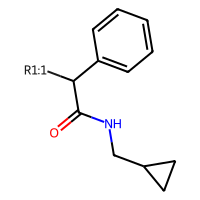
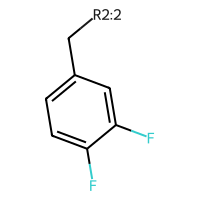
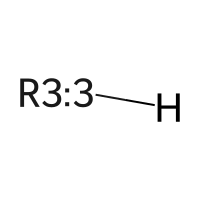

In [7]:
# scaffold for r-group decomposition
doc_scaffold = Chem.MolFromSmarts(scaffold)
doc_scaffold

# filter the data to just include the rows from our document:
doc_id = 1234
docdf = df[df.doc_id==doc_id]

# align all the molecules to the scaffold:
rdDepictor.Compute2DCoords(doc_scaffold)
for m in docdf.ROMol:
    rdDepictor.GenerateDepictionMatching2DStructure(m,doc_scaffold)

# do an r-group decomposition:
groups,unmatched = rdRGroupDecomposition.RGroupDecompose([doc_scaffold],docdf.ROMol,asSmiles=False,asRows=False) 

# and look at the results:
ms = [y for x,y in enumerate(docdf.ROMol) if x not in unmatched]
res = groups_to_df(groups,ms,include_core=False)
res.head()

In [8]:
groups,unmatched = rdRGroupDecomposition.RGroupDecompose([doc_scaffold],docdf.ROMol,asSmiles=False,asRows=False)

In [69]:
from collections import Counter
from IPython.display import HTML
from rdkit.Chem.Draw import rdMolDraw2D
import base64
def mol_to_img(m):
    dm = Draw.PrepareMolForDrawing(m)
    d2d = Draw.MolDraw2DCairo(150,100)
    dopts = d2d.drawOptions()
    dopts.dummiesAreAttachments=True
    d2d.DrawMolecule(dm)
    d2d.FinishDrawing()
    png_data = d2d.GetDrawingText() 
    png_data = base64.encodebytes(png_data)
    #<div style="width: 100px"> allows to control the size of the images in the table
    html ='<div style="width: 100px"><img src="data:image/png;base64,%s"></div>'%png_data.decode()
    return html

def get_color(elem):
    return "green" if elem < 100.0 else "red"

def run_groups(groups,unmatched,mols,values,r1_label='R1',r2_label='R2',threshold=1):
    # generate SAR matrix
    
    # generate SMILES for each of the R-groups and map those 
    # to the R-group's molecule objects:
    r1_smiles = [Chem.MolToSmiles(x) for x in groups[r1_label]]
    r2_smiles = [Chem.MolToSmiles(x) for x in groups[r2_label]]
    r1_lookup = dict(zip(r1_smiles,groups[r1_label]))
    r2_lookup = dict(zip(r2_smiles,groups[r2_label]))
    
    # all_r1s and all_r2s map R indices to the corresponding SMILES:
    all_r1s = dict([(y,x) for x,y in enumerate(r1_lookup.keys())])
    all_r2s = dict([(y,x) for x,y in enumerate(r2_lookup.keys())])
    
    # labelled_mols will contain 3-tuples:
    #   (molecule_index,R1_index,R2_index)
    labelled_mols = []
    residx = 0
    for i,m in enumerate(mols):
        if i in unmatched:
            continue
        r1_idx = all_r1s[r1_smiles[residx]]
        r2_idx = all_r2s[r2_smiles[residx]]
        residx += 1
        labelled_mols.append((i,r1_idx,r2_idx))
        
    # We only keep r groups that appear at least `threshold times in the full list:
    c1 = Counter()
    c2 = Counter()
    for idx,i,j in labelled_mols:
        c1[i] += 1
        c2[j] += 1
    freq1 = [x for x,y in c1.items() if y>=threshold]
    freq2 = [x for x,y in c2.items() if y>=threshold]
    reverse_r1s = dict([(y,x) for x,y in all_r1s.items()])
    reverse_r2s = dict([(y,x) for x,y in all_r2s.items()])
    freq_r1s = [reverse_r1s[i] for i in freq1]
    freq_r2s = [reverse_r2s[i] for i in freq2]
    n_r1 = len(freq1)
    n_r2 = len(freq2)
    
    # now construct a matrix 
    matrix = [None]*(n_r1*n_r2)
    matrix = np.reshape(matrix,(n_r1,n_r2))
    for idx,i,j in labelled_mols:
        if i not in freq1 or j not in freq2:
            continue
        r1idx = freq1.index(i)
        r2idx = freq2.index(j)
        matrix[r1idx,r2idx] = idx
        
    # now create the html from that
    html = "<table>"
    ths = "".join("<th>%s</th>"%mol_to_img(r2_lookup[x]) for x in freq_r2s)
    html += f"<tr><td></td>{ths}</tr>"
    for i1,x in enumerate(freq_r1s):
        img = mol_to_img(r1_lookup[x])
        row = f"<tr><td>{img}</td>"
        for i2,y in enumerate(freq_r2s):
            if matrix[i1,i2] is not None:
                elem = matrix[i1,i2]
                elem = values.iloc[elem]
                row += f'<td style="background-color: {get_color(elem)};">{elem}</td>'
            else:
                elem = ''
                row += f'<td style="background-color: grey;">{elem}</td>'
        html += row
    html += "</table>"
    return html

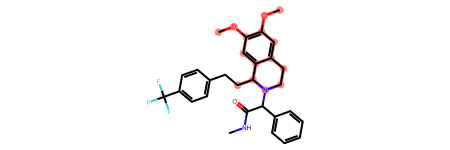

In [70]:
Almorexant

In [79]:
# SAR table with color label (grey: not measured, green IC50 < 100nM and red IC50 >= 100nM)
html = run_groups(groups,unmatched,docdf.ROMol,docdf.IC50,threshold=1)
HTML(html)